## Observations and Insights

---
1. Two of the drugs tested, Capomulin and Ramicane, seemed to be effective based on the data analyzed.
2. The final chart showed a positive correlation between mouse weight and the average tumor volume at 0.84.  This could suggest the need for controlling mouse weight to better determine drug efficacy.
3. Study data had few outliers making the trials appear more reliable.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mickey_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mickey_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
mickey_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mickeys = mickey_data.loc[mickey_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mickeys

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mickey_data[mickey_data.duplicated(['Mouse ID', 'Timepoint'], keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mickeys = mickey_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
mickey_mouse = unique_mickeys[unique_mickeys['Mouse ID'].isin(duplicate_mickeys)==False]
mickey_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Check the number of mice in the clean DataFrame.
mickey_mouse['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

trial_stats = pd.DataFrame(mickey_mouse.groupby('Drug Regimen').count())

#groupby to create stat data
trial_stats["Mean"] = pd.DataFrame(mickey_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
trial_stats["Median"] = pd.DataFrame(mickey_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
trial_stats["Std Dev"] = pd.DataFrame(mickey_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
trial_stats["Var"] = pd.DataFrame(mickey_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
trial_stats["SEM"] = pd.DataFrame(mickey_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
      
mickey_stats = trial_stats[["Mouse ID", "Mean", "Median", "Std Dev", "Var", "SEM"]]    
mickey_stats = mickey_stats.rename(columns = {"Mouse ID" : "Drug Trials"})

mickey_stats

,Drug Trials,Mean,Median,Std Dev,Var,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

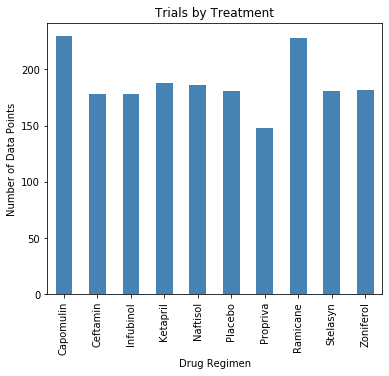

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mickey_bar = mickey_stats[["Drug Trials"]]
mickey_bar.plot(kind="bar", figsize=(6,5), color = "steelblue", legend=False)

#set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# add title & print
plt.title("Trials by Treatment")
plt.show()


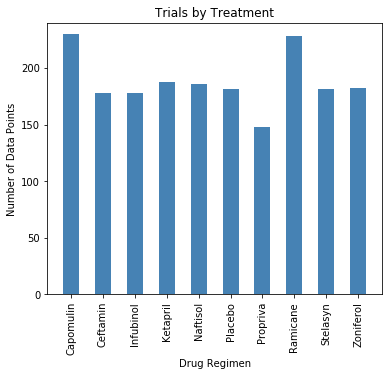

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# create x & add ticks
x_axis = np.arange(len(mickey_bar))
tick_marks = [value for value in x_axis]

# ready to plotty? I know I am
plt.figure(figsize=(6,5))
plt.bar(x_axis, mickey_bar["Drug Trials"], color = "steelblue", width = .5)
plt.xticks(tick_marks, mickey_bar.index.values, rotation="vertical")

# create x y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mickey_bar["Drug Trials"])+10)

#add labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# add title & print
plt.title("Trials by Treatment")
plt.show()

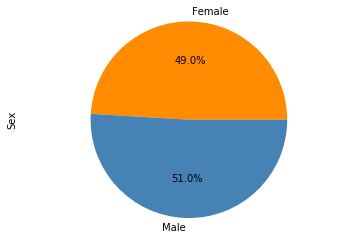

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mickeys_minnies = mickey_mouse.groupby('Sex')

# count gender df
mickeys_minnies_count = pd.DataFrame(mickeys_minnies['Sex'].count())

# it's plotty time
mickeys_minnies_count.plot(kind='pie', y='Sex', autopct='%1.1f%%', colors =["darkorange","steelblue"],legend =False)

plt.axis("equal")

plt.show()

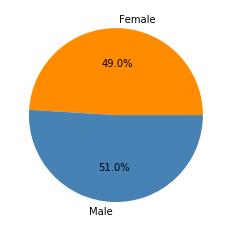

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create labels
mickey_minnie = list(mickeys_minnies_count.index.values)

# define values
mickey_minnie_counts = mickeys_minnies_count['Sex']

colors =["darkorange","steelblue"]

# plot it
plt.pie(mickey_minnie_counts, labels=mickey_minnie, colors=colors,
        autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
last_timept = mickey_mouse.groupby('Mouse ID').max()['Timepoint']

last_volume = pd.DataFrame(last_timept)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mickey_merge = pd.merge(last_volume, mickey_mouse, on=("Mouse ID","Timepoint"),how="left")
mickey_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    last_timept = mickey_merge.loc[mickey_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor volume data list
    
    tumor_vol_list.append(last_timept)
    
    # Determine outliers using upper and lower bounds
    quartiles = last_timept.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # upper & lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    #outliers
    tumor_outliers = last_timept[(last_timept > upper_bound)|(last_timept < lower_bound)] 
    
    print(f"{drug}'s potential outliers: {tumor_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


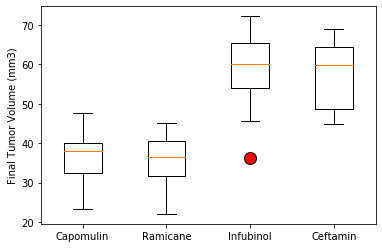

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# outlier dot
outlier_dot = dict(marker='o', markerfacecolor='red', markersize=12)

fig1, ax1 = plt.subplots()
# label y axis
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops=outlier_dot)
plt.show()

## Line and Scatter Plots

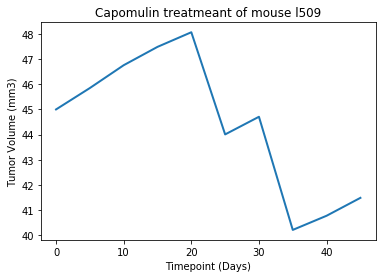

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_drug = mickey_data[mickey_data['Drug Regimen']=='Capomulin']
id_l509 = capo_drug[capo_drug['Mouse ID']=='l509']
id_l509_vol = id_l509['Tumor Volume (mm3)']

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(id_l509.Timepoint, id_l509_vol, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

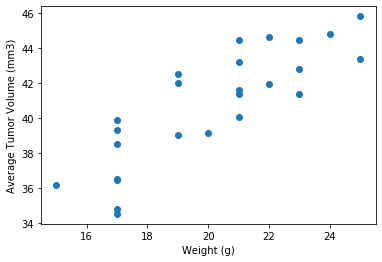

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_mean = capo_drug.groupby(['Mouse ID']).mean()

plt.scatter(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


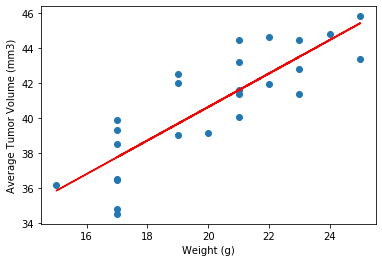

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# xy
x_values = capo_mean['Weight (g)']
y_values = capo_mean['Tumor Volume (mm3)']

# show correlation 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

# regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()